In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Mandatory Libraries**

In [56]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Getting Data**

In [57]:
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")

In [58]:
train_set = pd.read_csv("/kaggle/input/titanic/train.csv")
gender_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")

# **Analysing Overall Data**

In [59]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Analysing Example Output**

In [60]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# **Checking If There is Relation In Data**

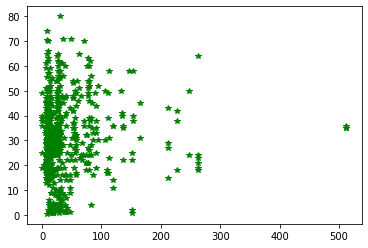

In [61]:
ages = train_set["Age"].copy()
fares = train_set["Fare"].copy()

plt.plot(fares,ages,"g*")

# **Turning "Sex" Into Number**

In [62]:
for i in range(891):# WE ARE USING .LOC INSTEAD OF CHAINED (  [][]  ) BRACKETS BECAUSE CHAINED BRACKETS CAN'T GUARANTEE THAT THEY WILL MAKE WANTED CHANGE FOR MORE INFO PLEASE READ PANDAS DOCUMENTATION
    if train_set.loc[i,'Sex'] == "male":
        train_set.loc[i,'Sex'] = 0
    else:
        train_set.loc[i,'Sex'] = 1
#DON'T RUN TWICE OR MORE
#MALE = 0, FEMALE = 1

In [63]:
train_set["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

# **Checking If Conversion Worked**

In [64]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


# **Checking For (Linear) Correlations**

In [65]:
correlation_matrix = train_set.corr()
correlation_matrix["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# **Checking For Rates of Survive for Males and Females discretely**

In [66]:
sex = train_set["Sex"].copy()
survived = train_set["Survived"].copy()
sex = sex
survived = survived
indices = []
for idx,x in enumerate(sex):
    if x == 0:
        indices.append(idx)
malesInSurvive = survived[indices]

survivedMales = 0

for x in malesInSurvive:
    if x == 1:
        survivedMales = survivedMales + 1
survivedMalesRate = survivedMales / len(malesInSurvive)
print(survivedMalesRate)


indicesF = []
for idx,x in enumerate(sex):
    if x == 1:
        indicesF.append(idx)
femalesInSurvive = survived[indicesF]

survivedFemales = 0

for x in femalesInSurvive:
    if x == 1:
        survivedFemales = survivedFemales + 1
survivedFemalesRate = survivedFemales / len(femalesInSurvive)
print(survivedFemalesRate)

0.18890814558058924
0.7420382165605095


# **Checking If Anything Changed Unintentionally**

In [67]:
train_set["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [68]:
train_set["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Checking Which Classes Still Not Numeric**

In [69]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Turning "Name" and "Sex" to numeric completely and checking for correlations(ofc linear)**

In [70]:
for x in range(891):
    train_set.loc[x,'Name'] = len(train_set.loc[x,'Name'])
train_set["Name"] = pd.to_numeric(train_set["Name"])#you need this to change string column to numeric completely
train_set["Sex"] = pd.to_numeric(train_set["Sex"])#you need this to change string column to numeric completely
correlation_matrix = train_set.corr()
correlation_matrix["Survived"]
#As you can see turning name into len(name) is working somehow.

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name           0.332350
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

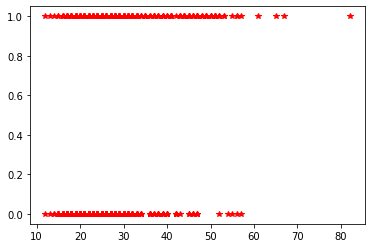

In [71]:
if "train_labels" in globals() or "train_labels" in locals():#this code checks for train_labels and plots it if it exists
    plt.plot(train_set["Name"],train_labels,"r*")#you can ask that why i did this ? Because train_labels variable is created at the
    #end of the notebook so you are not going to be able to use it at first run but i don't want you to get an error too

# **Correlation Matrix**

array([[<AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Name', ylabel='Sex'>,
        <AxesSubplot:xlabel='Survived', ylabel='Sex'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Name'>,
        <AxesSubplot:xlabel='Name', ylabel='Name'>,
        <AxesSubplot:xlabel='Survived', ylabel='Name'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Name'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Survived'>,
        <AxesSubplot:xlabel='Name', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Name', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

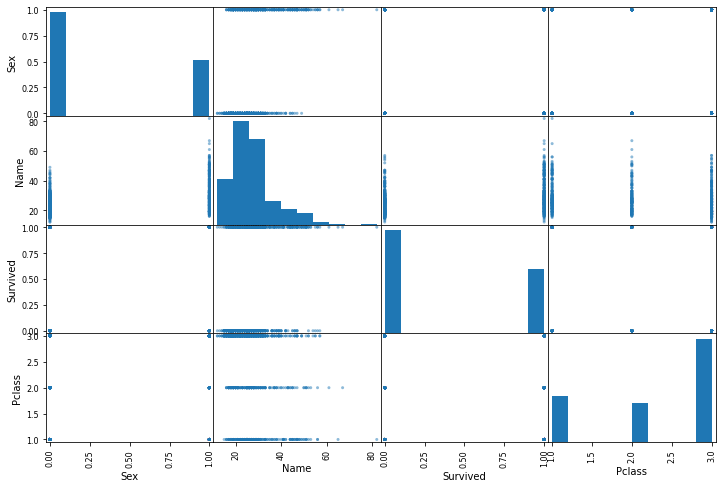

In [72]:
from pandas.plotting import scatter_matrix

attributes = ["Sex","Name","Survived","Pclass"]

scatter_matrix(train_set[attributes], figsize=(12,8))

# **Dropping Unuseful Features(Probably they are not unuseful but we need to convert them to numbers in a reasonable way and to do this we need to understand the problem more)**

In [73]:
train_set = train_set.drop("Embarked",axis=1)
train_set = train_set.drop("Ticket",axis=1)
train_set = train_set.drop("Cabin",axis=1)

# **Completing Missing Values With Others' Median**

In [74]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(train_set)

imputer.statistics_

array([446.    ,   0.    ,   3.    ,  25.    ,   0.    ,  28.    ,
         0.    ,   0.    ,  14.4542])

In [75]:
train_set = imputer.transform(train_set)
train_set = pd.DataFrame(train_set, columns=["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Fare"])#recreating data frame because imputer outputs a plain array
train_set#checking if everything is okey

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,23.0,0.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,51.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,22.0,1.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,44.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,24.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,21.0,0.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,28.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,40.0,1.0,28.0,1.0,2.0,23.4500
889,890.0,1.0,1.0,21.0,0.0,26.0,0.0,0.0,30.0000


# **Dropping(Returning then removing) "Survived" Column because It's Our Label That We Will Fit Into ML Algorithms**

In [76]:
train_labels = train_set["Survived"]
train_set = train_set.drop("Survived",axis=1)#axis 1 means column-wise

In [77]:
train_labels#checking if everything is okey

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [78]:
train_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,23.0,0.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,51.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,22.0,1.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,44.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,24.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,887.0,2.0,21.0,0.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,28.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,3.0,40.0,1.0,28.0,1.0,2.0,23.4500
889,890.0,1.0,21.0,0.0,26.0,0.0,0.0,30.0000


# **Preparing Some Data to Use**

In [79]:
some_data = train_set.iloc[:20]
some_labels = train_labels.iloc[:20]
some_labels

0     0.0
1     1.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    0.0
13    0.0
14    0.0
15    1.0
16    0.0
17    1.0
18    0.0
19    1.0
Name: Survived, dtype: float64

# **Searching For Optimal(at least close to optimal) Parameters**

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [20,30,46,47,48,49,50], 'max_features': [6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10,20,30,40], 'max_features': [4,5,6,7]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_set, train_labels)

grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=50)

# **Checking the Accuracy on Some Data**

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 50000,max_features = 8)#Don't forget to change these 
forest_reg.fit(train_set, train_labels)



forest_reg.predict(some_data)
results = 0
for idx,x in enumerate(forest_reg.predict(some_data)):
    if x >= 0.5 and some_labels[idx] == 1:
        results = results + 1
    if x < 0.5 and some_labels[idx] == 0:
        results = results + 1
results = results / len(some_labels)
print(results)

1.0


# **From Now On We Will Prepare Test Set but Since I have Already Explained at Training Set(there will be really no change) I Won't Explain Again and You Can Skip to Bottom of Page If You Want**

In [83]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
for i in range(418):
    if test_set.loc[i,'Sex'] == "male":
        test_set.loc[i,'Sex'] = 0
    else:
        test_set.loc[i,'Sex'] = 1
#DON'T RUN TWICE OR MORE
#MALE = 0, FEMALE = 1

In [85]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [86]:
for i in range(418):
    test_set.loc[i,'Name'] = len(test_set.loc[i,'Name'])
#DON'T RUN TWICE OR MORE

In [87]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,16,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,32,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,25,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,16,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,44,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,18,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,28,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,28,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,19,0,NaN,0,0,359309,8.0500,NaN,S


In [88]:
column_names = test_set.columns
column_names

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
imputer.statistics_#medians that calculated before

array([446.    ,   0.    ,   3.    ,  25.    ,   0.    ,  28.    ,
         0.    ,   0.    ,  14.4542])

In [90]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [91]:
for idx,x in enumerate(range(418)):#we are manually assigning median's that calculated before
    if pd.isna(test_set.loc[idx,"Age"]):test_set.loc[idx,"Age"] = 28
for idx,x in enumerate(range(418)):
    if pd.isna(test_set.loc[idx,"Fare"]):test_set.loc[idx,"Fare"] = 14.4542
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,16,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,32,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,25,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,16,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,44,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,18,0,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,28,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,28,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,19,0,28.0,0,0,359309,8.0500,NaN,S


In [92]:
test_set = test_set.drop("Embarked",axis=1)
test_set = test_set.drop("Ticket",axis=1)
test_set = test_set.drop("Cabin",axis=1)

In [93]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,16,0,34.5,0,0,7.8292
1,893,3,32,1,47.0,1,0,7.0000
2,894,2,25,0,62.0,0,0,9.6875
3,895,3,16,0,27.0,0,0,8.6625
4,896,3,44,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...
413,1305,3,18,0,28.0,0,0,8.0500
414,1306,1,28,1,39.0,0,0,108.9000
415,1307,3,28,0,38.5,0,0,7.2500
416,1308,3,19,0,28.0,0,0,8.0500


# **Now We are Making Predictions On Test Set And Format Them As Wanted**

In [97]:
predictions = forest_reg.predict(test_set)#we are making forest to predict
results_test = predictions>=0.5#Our threshold is 0.5 and we are assigning everything bigger than and equal to 0.5, to True then 1
passengers = test_set["PassengerId"]#getting passenger ids to a variable to access quickly
results_test.reshape(-1,1)#ReShaping so we can use this with Passenger Ids
results_test = results_test * 1 # to turn Falses and Trues to 0s and 1s
str_array = [["PassengerId","Survived"]]#to turn array to csv we need to include column names as a list at the top of *list of lists*
for i,p in zip(passengers,results_test):#turning our results into wanted format
    str_array.append([i,p])
for idx,x in enumerate(str_array):
    if idx <10:
        print(x)
print("...")

['PassengerId', 'Survived']
[892, 0]
[893, 0]
[894, 0]
[895, 0]
[896, 0]
[897, 0]
[898, 0]
[899, 0]
[900, 1]
...


In [98]:
import csv

# open the file in the write mode
f = open('/kaggle/working/submission.csv',"w")


# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
for row in str_array:
    writer.writerow(row)

# close the file
f.close()


In [99]:
submission_with_forest = pd.read_csv("/kaggle/working/submission.csv")
submission_with_forest#we will submit this, you can download it from the "DATA" segment of this page

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
